## Loan Application Status Prediction

Problem Statement:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We will build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
import pandas as pd
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# loan_ID column can be removed as it has no significance in prediction
df.drop(columns=["Loan_ID"],inplace=True)

In [5]:
# Checking null values and data type of each column
for col in df.columns:
    print("Column name :",col, "  Column data type :",df[col].dtype, "  Null values: ",df[col].isnull().sum())
#Below o/p shows presense of null values in each column   

Column name : Gender   Column data type : object   Null values:  13
Column name : Married   Column data type : object   Null values:  3
Column name : Dependents   Column data type : object   Null values:  15
Column name : Education   Column data type : object   Null values:  0
Column name : Self_Employed   Column data type : object   Null values:  32
Column name : ApplicantIncome   Column data type : int64   Null values:  0
Column name : CoapplicantIncome   Column data type : float64   Null values:  0
Column name : LoanAmount   Column data type : float64   Null values:  22
Column name : Loan_Amount_Term   Column data type : float64   Null values:  14
Column name : Credit_History   Column data type : float64   Null values:  50
Column name : Property_Area   Column data type : object   Null values:  0
Column name : Loan_Status   Column data type : object   Null values:  0


In [6]:
# Describing the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are outliers present in the dataset.

In [7]:
# Checking the corrrelation matrix
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Data Visualization

<AxesSubplot:>

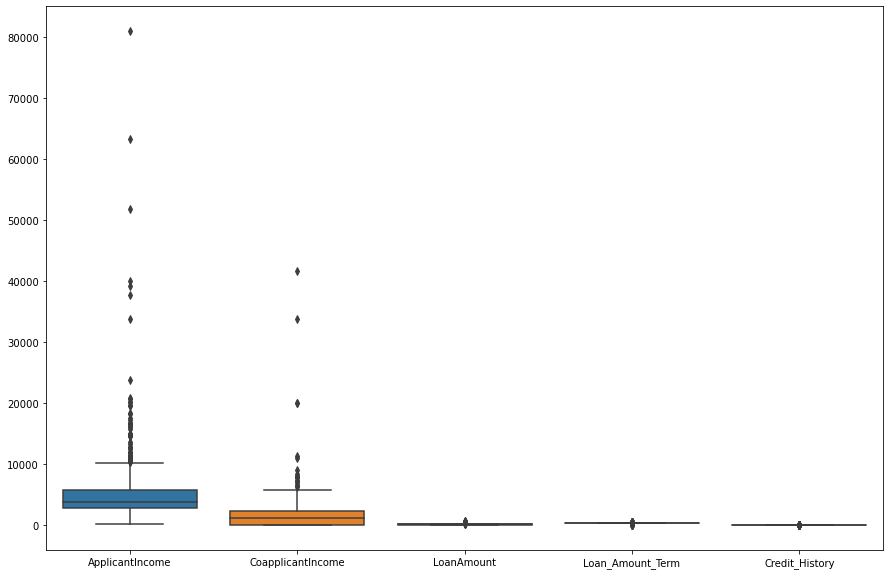

In [8]:
#Checking for outliers in columns with boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="v")

Columns "ApplicantIncome" and "CoapplicantIncome" have many outliers but they indicate some people having very high income so no need to remove them. However, skewness can be removed from such columns without removing outliers.

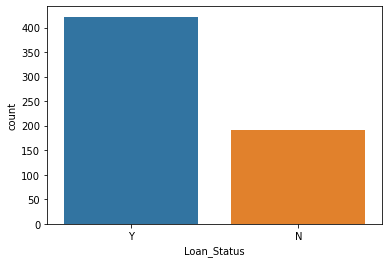

In [9]:
# Checking the count of each type of class in loan status 
sns.countplot(x="Loan_Status",data=df)
plt.show()

It is an imbalanced dataset problem so we can use SMOTE just to increase instances of minority classes in training dataset.

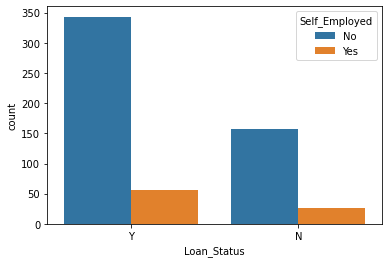

In [10]:
# Checking the count of loan status considering "Self_Employed"
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)
plt.show()

Self-employed people get far less loans as compared to those who are not self-employed.

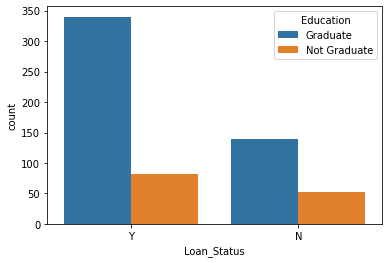

In [11]:
# Checking the count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

Graduates have more tendency of getting loans than non-graduates.

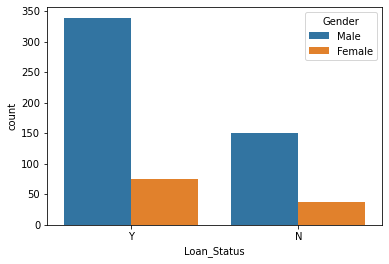

In [12]:
# Checking loan status based on gender
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

There are more number of males applying for the loans compared to females.

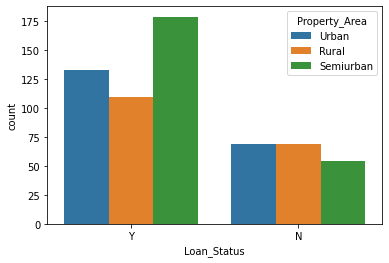

In [13]:
# Checking the loan status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

People having semi-urban property area take more loans than the others.

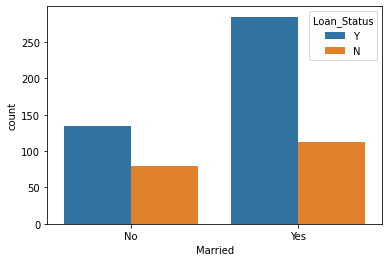

In [14]:
# Checking the count based on marital status
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

Ratio of people geting loans to not getting loans when they are married is high.

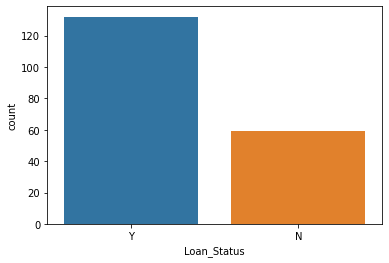

In [15]:
# Checking loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000])
plt.show()

For applicant income greater than 5000, people whose loan was sanctioned are more than double of people whose loan was not sanctioned.

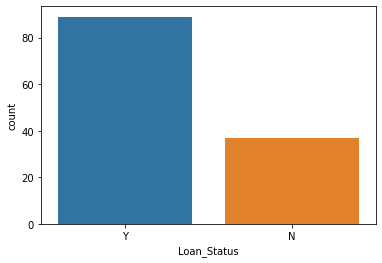

In [16]:
# Checking the effect on above count if co-applicant income is 0
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>5000)&(df["CoapplicantIncome"]==0)])
plt.show()

Here, count has reduced but still ratio is almost same if coapplicant income is 0.

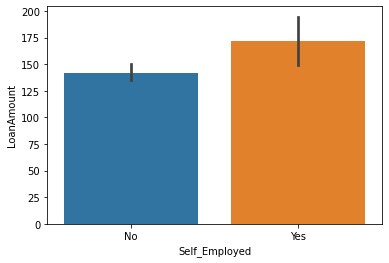

In [18]:
# Comparing the average loan amount between self-employed and those who are not self-employed
sns.barplot(y="LoanAmount",x="Self_Employed",data=df)
plt.show()

Average loan amount demanded by the self-employed is more but there is not too much difference.

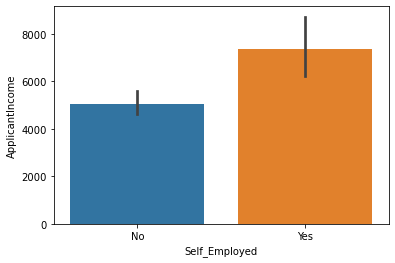

In [19]:
# Now comparing the average income of self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=df)
plt.show()

Average income for self-employed is more.

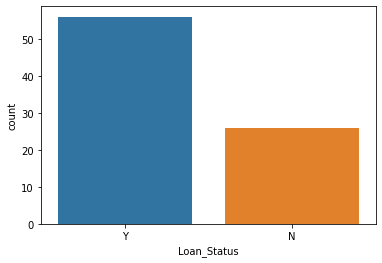

In [20]:
# Comparing the count of self employed people who got loans and who did not get loans
sns.countplot(x="Loan_Status",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

There are more than double number of self-employed who got loan. It may be due to their high income.

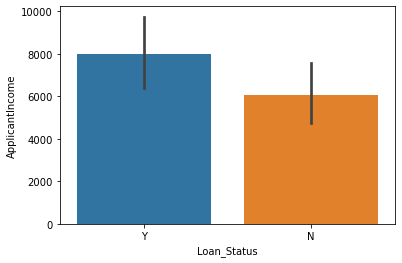

In [21]:
# Now comparing the average income of people who got loan and who did not,given they are self employed.
# Checking for applicant's income for self employed and their loan status
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

So self-employed people who got loan have average income more as observed in previous result.

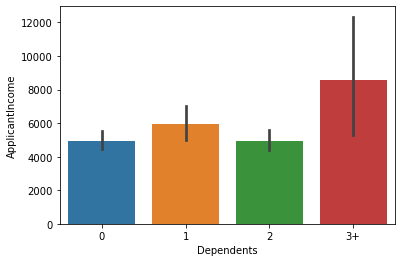

In [22]:
# Checking for average applicant income as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

Average income of people with 2 dependents is less than those with 1 dependent. However, those with more than 3 dependents, the income is high. It may be due to very high income of those people or they have other earning members.

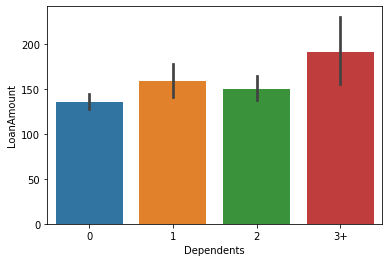

In [23]:
# Checking the average loan amount as per dependents
sns.barplot(y="LoanAmount",x="Dependents",data=df)
plt.show()

Also, average loan amount by person with dependents more than 3 is highest which further supports our previous conclusion.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

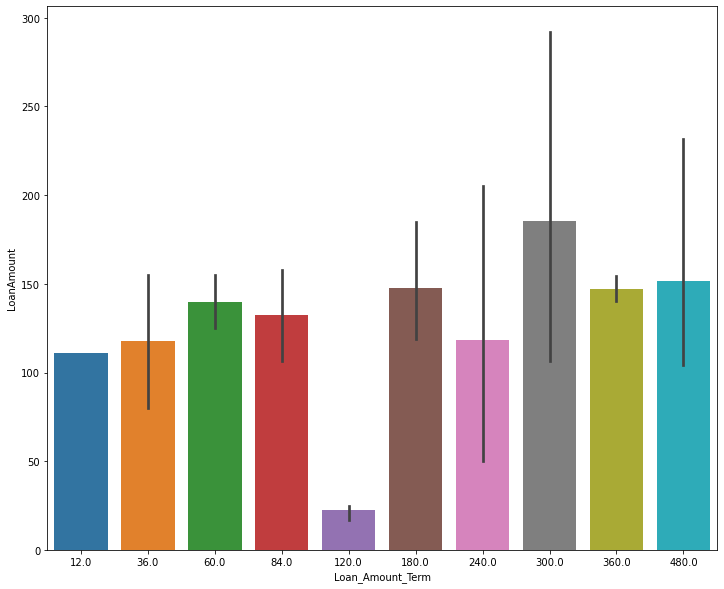

In [24]:
#Average loan amount requested grouped by Loan_Amount_Term
plt.figure(figsize=(12,10))
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)

In [25]:
# Checking the null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [27]:
# Now treating null values by imputing
# Imputing the object datatype columns by mode grouped by same target class
for col in df.columns:
    if df[col].dtypes=="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [28]:
# Checking for null values again
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The object datatype columns do not contain null values now.

In [29]:
# Now working on null values of float datatype columns 
# Loan amount can be imputed by mean grouped by classes
df.loc[df["Loan_Status"]=="Y",["LoanAmount"]]=df.loc[df["Loan_Status"]=="Y",["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=="Y",["LoanAmount"]].mean())
df.loc[df["Loan_Status"]=="N",["LoanAmount"]]=df.loc[df["Loan_Status"]=="N",["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=="N",["LoanAmount"]].mean())

In [30]:
#Checking Null values again
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# Imputing Loan_Amount_Term column with mean grouped by classes
df.loc[df["Loan_Status"]=="Y",["Loan_Amount_Term"]]=df.loc[df["Loan_Status"]=="Y",["Loan_Amount_Term"]].fillna(df.loc[df["Loan_Status"]=="Y",["Loan_Amount_Term"]].mean())
df.loc[df["Loan_Status"]=="N",["Loan_Amount_Term"]]=df.loc[df["Loan_Status"]=="N",["Loan_Amount_Term"]].fillna(df.loc[df["Loan_Status"]=="N",["Loan_Amount_Term"]].mean())

In [32]:
# Imputing Credit_History column with mode as it contains only 2 values- 0.0 and 1.0
df.loc[df["Loan_Status"]=="Y",["Credit_History"]]=df.loc[df["Loan_Status"]=="Y",["Credit_History"]].fillna(df.loc[df["Loan_Status"]=="Y",["Credit_History"]].mode().iloc(0))
df.loc[df["Loan_Status"]=="N",["Credit_History"]]=df.loc[df["Loan_Status"]=="N",["Credit_History"]].fillna(df.loc[df["Loan_Status"]=="N",["Credit_History"]].mode().iloc())

In [33]:
# Again checking null values after imputing them
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
# Checking the skewness of the dataset
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.390012
dtype: float64

Above columns are highly skewed due to presence of outliers, so they need to be treated for skewness.

In [35]:
# Dividing the dataset into input and output
df_x=df.drop(columns=["Loan_Status"])
y=df[["Loan_Status"]]

In [36]:
# Removing skewness with log transformation method
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])

In [37]:
# Again checking the skewness
df_x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.390012
dtype: float64

Now the skewness is significantly removed from these columns.

In [38]:
# Checking the datatypes in input dataset
df_x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
dtype: object

In [39]:
# Using one-hot encoding for features dataset
df_x=pd.get_dummies(df_x,drop_first=True)

In [40]:
# Checking the shape
df_x.shape

(614, 16)

In [41]:
y.shape

(614, 1)

In [42]:
# Bringing all features to a common scale using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [43]:
# Using LabelEncoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [44]:
# Since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [45]:
# Using logistic regression and check
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7701238390092879
auc roc score corresponding to  43  is  0.774613003095975
auc roc score corresponding to  44  is  0.7188854489164087
auc roc score corresponding to  45  is  0.7628482972136222
auc roc score corresponding to  46  is  0.7410216718266254
auc roc score corresponding to  47  is  0.7085139318885448
auc roc score corresponding to  48  is  0.7057275541795665
auc roc score corresponding to  49  is  0.7639318885448916
auc roc score corresponding to  50  is  0.7715170278637771
auc roc score corresponding to  51  is  0.7362229102167182
auc roc score corresponding to  52  is  0.7054179566563468
auc roc score corresponding to  53  is  0.7597523219814242
auc roc score corresponding to  54  is  0.7337461300309599
auc roc score corresponding to  55  is  0.7891640866873064
auc roc score corresponding to  56  is  0.6444272445820434
auc roc score corresponding to  57  is  0.7365325077399381
auc roc score corresponding to  58  is  0.679411764705882

77

In [46]:
# Checking with Decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6673374613003096
auc roc score corresponding to  43  is  0.6572755417956657
auc roc score corresponding to  44  is  0.6365325077399381
auc roc score corresponding to  45  is  0.6835913312693498
auc roc score corresponding to  46  is  0.6922600619195046
auc roc score corresponding to  47  is  0.6160990712074305
auc roc score corresponding to  48  is  0.6205882352941177
auc roc score corresponding to  49  is  0.6791021671826625
auc roc score corresponding to  50  is  0.6746130030959752
auc roc score corresponding to  51  is  0.681888544891641
auc roc score corresponding to  52  is  0.6174922600619195
auc roc score corresponding to  53  is  0.7157894736842105
auc roc score corresponding to  54  is  0.6424148606811146
auc roc score corresponding to  55  is  0.6452012383900928
auc roc score corresponding to  56  is  0.6908668730650155
auc roc score corresponding to  57  is  0.6718266253869969
auc roc score corresponding to  58  is  0.673529411764705

64

In [47]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [48]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7538699690402476
auc roc score corresponding to  43  is  0.7715170278637771
auc roc score corresponding to  44  is  0.6894736842105263
auc roc score corresponding to  45  is  0.7247678018575852
auc roc score corresponding to  46  is  0.7452012383900928
auc roc score corresponding to  47  is  0.7012383900928792
auc roc score corresponding to  48  is  0.6866873065015481
auc roc score corresponding to  49  is  0.7905572755417957
auc roc score corresponding to  50  is  0.7071207430340558
auc roc score corresponding to  51  is  0.780185758513932
auc roc score corresponding to  52  is  0.6791021671826625
auc roc score corresponding to  53  is  0.7642414860681115
auc roc score corresponding to  54  is  0.7452012383900928
auc roc score corresponding to  55  is  0.7670278637770898
auc roc score corresponding to  56  is  0.6821981424148607
auc roc score corresponding to  57  is  0.7510835913312693
auc roc score corresponding to  58  is  0.678018575851393

49

In [49]:
# Using KNN
# For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 26}

In [50]:
kc=KNeighborsClassifier(n_neighbors=26)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7393188854489163
auc roc score corresponding to  43  is  0.6662538699690402
auc roc score corresponding to  44  is  0.6808049535603716
auc roc score corresponding to  45  is  0.7334365325077399
auc roc score corresponding to  46  is  0.7057275541795665
auc roc score corresponding to  47  is  0.7261609907120743
auc roc score corresponding to  48  is  0.6513931888544893
auc roc score corresponding to  49  is  0.758359133126935
auc roc score corresponding to  50  is  0.6628482972136223
auc roc score corresponding to  51  is  0.7258513931888545
auc roc score corresponding to  52  is  0.7023219814241486
auc roc score corresponding to  53  is  0.78328173374613
auc roc score corresponding to  54  is  0.7057275541795665
auc roc score corresponding to  55  is  0.780185758513932
auc roc score corresponding to  56  is  0.6928792569659443
auc roc score corresponding to  57  is  0.7040247678018576
auc roc score corresponding to  58  is  0.7029411764705882
a

69

In [51]:
# Using SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [52]:
svc=SVC(kernel="rbf",C=0.1)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7704334365325077
auc roc score corresponding to  43  is  0.7046439628482972
auc roc score corresponding to  44  is  0.7046439628482972
auc roc score corresponding to  45  is  0.75
auc roc score corresponding to  46  is  0.6987616099071208
auc roc score corresponding to  47  is  0.7309597523219815
auc roc score corresponding to  48  is  0.6914860681114552
auc roc score corresponding to  49  is  0.7908668730650155
auc roc score corresponding to  50  is  0.7382352941176471
auc roc score corresponding to  51  is  0.7863777089783281
auc roc score corresponding to  52  is  0.7160990712074303
auc roc score corresponding to  53  is  0.7777089783281734
auc roc score corresponding to  54  is  0.7309597523219815
auc roc score corresponding to  55  is  0.7659442724458203
auc roc score corresponding to  56  is  0.678328173374613
auc roc score corresponding to  57  is  0.725077399380805
auc roc score corresponding to  58  is  0.6856037151702786
auc roc score

76

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [54]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7348297213622291
auc roc score corresponding to  43  is  0.7538699690402476
auc roc score corresponding to  44  is  0.7012383900928792
auc roc score corresponding to  45  is  0.7524767801857586
auc roc score corresponding to  46  is  0.6849845201238389
auc roc score corresponding to  47  is  0.7289473684210527
auc roc score corresponding to  48  is  0.6631578947368422
auc roc score corresponding to  49  is  0.7452012383900928
auc roc score corresponding to  50  is  0.7099071207430339
auc roc score corresponding to  51  is  0.7376160990712075
auc roc score corresponding to  52  is  0.7258513931888545
auc roc score corresponding to  53  is  0.8023219814241486
auc roc score corresponding to  54  is  0.7116099071207429
auc roc score corresponding to  55  is  0.768421052631579
auc roc score corresponding to  56  is  0.7116099071207429
auc roc score corresponding to  57  is  0.6925696594427245
auc roc score corresponding to  58  is  0.647213622291021

99

In [55]:
# Checking AdaBoost using decision tree as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=dc)
max_aucroc_score(ada_clf,df_x,y)

auc roc score corresponding to  42  is  0.7303405572755417
auc roc score corresponding to  43  is  0.6586687306501546
auc roc score corresponding to  44  is  0.5631578947368422
auc roc score corresponding to  45  is  0.6936532507739939
auc roc score corresponding to  46  is  0.6746130030959752
auc roc score corresponding to  47  is  0.638235294117647
auc roc score corresponding to  48  is  0.6379256965944272
auc roc score corresponding to  49  is  0.6116099071207429
auc roc score corresponding to  50  is  0.6936532507739939
auc roc score corresponding to  51  is  0.7434984520123838
auc roc score corresponding to  52  is  0.6642414860681115
auc roc score corresponding to  53  is  0.6631578947368422
auc roc score corresponding to  54  is  0.6760061919504644
auc roc score corresponding to  55  is  0.756656346749226
auc roc score corresponding to  56  is  0.6676470588235295
auc roc score corresponding to  57  is  0.6541795665634675
auc roc score corresponding to  58  is  0.6410216718266253

55

In [56]:
#lets use cross_val_score for logistic regression
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8084227348159236
standard deviation in roc auc score for logistic classifier:  0.046368942688494015
[0.85510836 0.7625387  0.82539683 0.8543956  0.74467419]


In [57]:
#lets use cross_val_score for decision tree
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6950356093854546
standard deviation in auc roc score for decision tree classifier:  0.019746645497622988
[0.70402477 0.63684211 0.66895604 0.73626374 0.71334586]


In [58]:
#lets check cross_val_score for random forest
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.813761713862333
standard deviation in auc roc score for random forest classifier:  0.03617886028429046
[0.84055728 0.73095975 0.82722833 0.84569597 0.79401629]


In [59]:
#lets use cross_val_score for knn 
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for knn classifier:  0.791553109772924
standard deviation in roc auc score for knn classifier:  0.02430727205585847
[0.80123839 0.76130031 0.77930403 0.83302808 0.78289474]


In [60]:
#lets use cross_val_score for svm
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for svm classifier:  0.7874915229249595
standard deviation in roc auc score for svm classifier:  0.03223201984191068
[0.80712074 0.73591331 0.81379731 0.81715507 0.76347118]


In [61]:
#lets check cross_val_score for gradient boosting
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for gradient boosting classifier:  0.7921139008909908
standard deviation in auc roc score for gradient boosting classifier:  0.04715006276540935
[0.82569659 0.69566563 0.78846154 0.85409035 0.79354637]


In [62]:
# We will use random forest as our final model with random state 49 as it has greater mean AUC-ROC score than other models
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 49, test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[26 12]
 [13 72]]
f1 score is :  0.8520710059171598
classification report 
               precision    recall  f1-score   support

           0       0.67      0.68      0.68        38
           1       0.86      0.85      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.80      0.80      0.80       123

AUC ROC Score:  0.7656346749226006
